In [3]:
import numpy as np
import pandas as pd
import itertools
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [10]:
df=pd.read_csv('/content/fake_or_real_news.csv',engine='python')

#Get shape and head
print(df.shape)
print(df.head())

(6335, 4)
   Unnamed: 0  ... label
0        8476  ...  FAKE
1       10294  ...  FAKE
2        3608  ...  REAL
3       10142  ...  FAKE
4         875  ...  REAL

[5 rows x 4 columns]


In [18]:
labels=df.label
print(labels.head())

0    0
1    0
2    1
3    0
4    1
Name: label, dtype: object


In [24]:
df = df.drop(['Unnamed: 0','title'],axis=1)

In [25]:
df.columns

Index(['text', 'label'], dtype='object')

In [17]:
df.label[df.label == 'FAKE'] = 0
df.label[df.label == 'REAL'] = 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [30]:
X = df.drop(["label"],axis=1)
y = df["label"]

In [33]:
import nltk
nltk.download('stopwords')
  

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [26]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, HashingVectorizer

In [34]:
ps = PorterStemmer()
corpus=[]
for i in range(0,len(X)):
    review = re.sub("[^a-zA-Z]"," ",X["text"][i])
    review = review.lower()
    review = review.split()
    review = [ps.stem(word) for word in review if word not in stopwords.words("english")]
    review = " ".join(review)
    corpus.append(review)

In [42]:
df['review'] = corpus

In [44]:
df

,text,label,review
0,"Daniel Greenfield, a Shillman Journalism Fello...",0,daniel greenfield shillman journal fellow free...
1,Google Pinterest Digg Linkedin Reddit Stumbleu...,0,googl pinterest digg linkedin reddit stumbleup...
2,U.S. Secretary of State John F. Kerry said Mon...,1,u secretari state john f kerri said monday sto...
3,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",0,kayde king kaydeek novemb lesson tonight dem l...
4,It's primary day in New York and front-runners...,1,primari day new york front runner hillari clin...
...,...,...,...
6330,The State Department told the Republican Natio...,1,state depart told republican nation committe c...
6331,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,0,p pb stand plutocrat pentagon post oct wikimed...
6332,Anti-Trump Protesters Are Tools of the Oligar...,0,anti trump protest tool oligarchi reform alway...
6333,"ADDIS ABABA, Ethiopia —President Obama convene...",1,addi ababa ethiopia presid obama conven meet l...


In [45]:
x_train,x_test,y_train,y_test=train_test_split(df['review'], labels, test_size=0.2, random_state=7)

In [46]:
# Initialize a TfidfVectorizer
tfidf_vectorizer=TfidfVectorizer(stop_words='english', max_df=0.7)

In [47]:
tfidf_train=tfidf_vectorizer.fit_transform(x_train) 
tfidf_test=tfidf_vectorizer.transform(x_test)

In [52]:
y_train = y_train.astype('int')
y_test = y_test.astype('int')

In [61]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
classifier=RandomForestClassifier()

classifier.fit(tfidf_train, y_train)
pred = classifier.predict(tfidf_test)

score = metrics.accuracy_score(y_test, pred)

In [62]:
print("Accuracy of the model: {}%".format(score*100))

Accuracy of the model: 89.97632202052091%


In [63]:
confusion_matrix(y_test,pred, labels=[0,1])

array([[581,  57],
       [ 70, 559]])

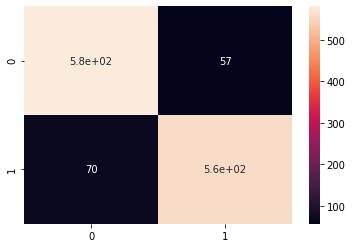

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt
cm = metrics.confusion_matrix(y_test, pred)
sns.heatmap(cm, annot=True)